In [1]:
%matplotlib inline

import math
import matplotlib
import numpy as np
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

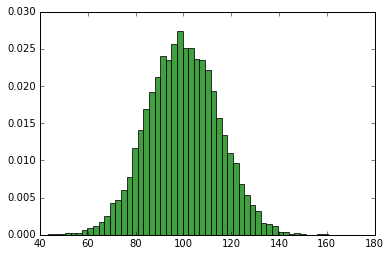

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.show()

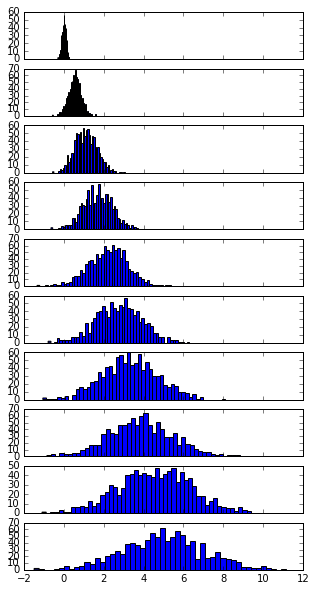

In [6]:
# gaussian distribution
# loc = mean, scale = standard deviation
n_pdfs = 10
n_x = 1000

mean = np.linspace(0, 5, num=n_pdfs)
stdev = np.linspace(0.1, 2, num=n_pdfs)

# compare distributions of random numbers vs. a pdf
# random numbers
rand_norm = np.zeros((n_x, n_pdfs))
for i in range(n_pdfs):
    rand_norm[:,i] = stats.norm.rvs(mean[i], stdev[i], n_x)

f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].hist(rand_norm[:,i], 50)


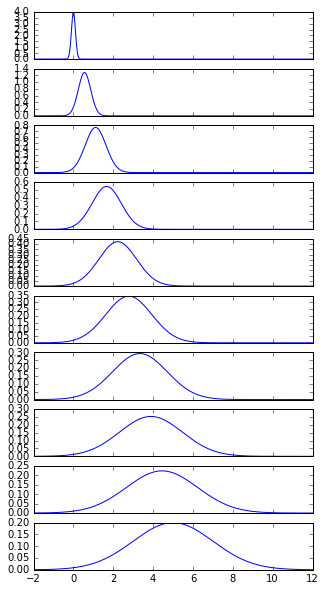

In [7]:
# probability distribution function
x = np.linspace(-2, 12, num=n_x)

pdfs_norm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_norm[:,i] = stats.norm.pdf(x, loc=mean[i], scale=stdev[i])

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_norm[:,i])

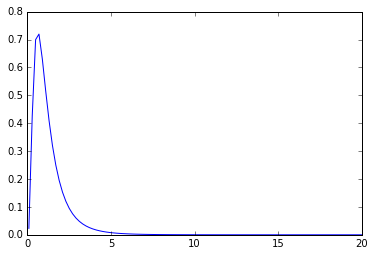

In [4]:
# log normal distribution
# single value simulation

M = float(1) # geometric mean
s = float(2) # geometric standard deviation
mu = np.log(M)
sigma = np.log(s)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 20, num=100)

pdf_lnorm = lognorm.pdf(x, sigma, loc=0, scale=np.exp(mu))

plt.plot(x, pdf_lnorm)
plt.show()

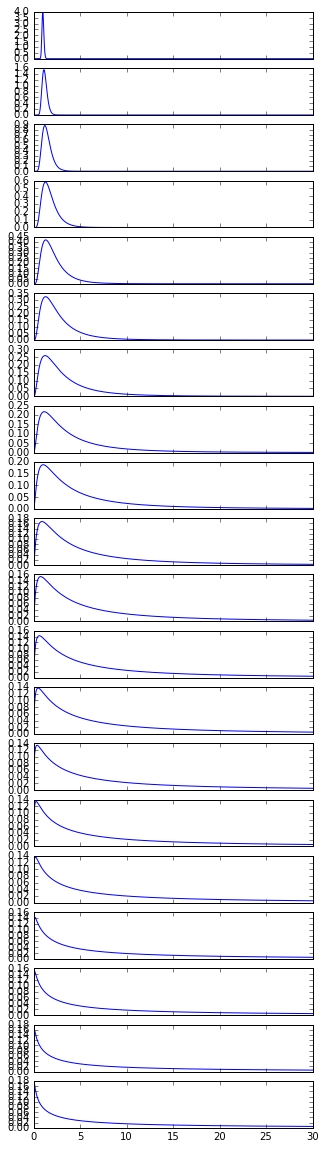

In [5]:
# series of values
n_pdfs = 20
n_x = 1000

mu = np.linspace(0, 3, num=n_pdfs)
sigma = np.linspace(0.1, 2.5, num=n_pdfs)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 30, num=n_x)

pdfs_lnorm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_lnorm[:,i] = lognorm.pdf(x, sigma[i], loc=0, scale=np.exp(mu[i]))

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_lnorm[:,i])
